In [1]:
import pandas as pd
import requests
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Balance Sheet 

In [14]:
def get_bs(ticker):
    bs = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{ticker}?period=quarter&apikey=77d47c5d1debc07182939544406223dc')
    bs = bs.json()
    balance_sheet = pd.DataFrame.from_dict(bs)
    return balance_sheet

In [19]:
bs = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/COST?period=quarter&apikey=96e7d56bd5004623b04321f03aaeb2ac')
bs.json()

{'Error Message': 'Limit Reach . Please upgrade your plan or visit our documentation for more details at https://financialmodelingprep.com/developer/docs/pricing '}

In [10]:
def clean_bs(ticker, clean):
   # Make a date only dataframe
    balance_sheet = get_bs(ticker)
    bs_date = balance_sheet['date']
    #Drop date column and change dataframe to all float datatype
    drop_bs_date = bs_date.drop('date', axis=1)
    bs1 = drop_bs_date.apply(pd.to_numeric, errors='coerce')
    #Combine seperated dataframes
    bs = pd.Series(bs_date, name='Date')
    bs2 = pd.concat([bs, bs1], axis=1)
    #Create datetime series and set index
    bs_date = pd.to_datetime(bs2['Date'])
    bs_index = pd.DatetimeIndex(bs_date)
    bs = bs2.set_index(bs_index)
    bs = bs.drop('Date', axis=1)
    bs = bs/1000
    #bs = bs.style.format("{:,.0f}")
    #bs = pd.DataFrame.from_dict(bs)
    return bs

In [11]:
stock_bs = clean_bs('IRTC', get_bs('IRTC'))

ValueError: If using all scalar values, you must pass an index

In [ ]:
stock_bs = stock_bs.drop(columns={'symbol', 'fillingDate', 'acceptedDate', 'period', 'link', 'finalLink'})

In [ ]:
stock_bs.head(8)

In [251]:
bs_c = stock_bs.columns
bs_c

Index(['cashAndCashEquivalents', 'shortTermInvestments',
       'cashAndShortTermInvestments', 'netReceivables', 'inventory',
       'otherCurrentAssets', 'totalCurrentAssets', 'propertyPlantEquipmentNet',
       'goodwill', 'intangibleAssets', 'goodwillAndIntangibleAssets',
       'longTermInvestments', 'taxAssets', 'otherNonCurrentAssets',
       'totalNonCurrentAssets', 'otherAssets', 'totalAssets',
       'accountPayables', 'shortTermDebt', 'taxPayables', 'deferredRevenue',
       'otherCurrentLiabilities', 'totalCurrentLiabilities', 'longTermDebt',
       'deferredRevenueNonCurrent', 'deferrredTaxLiabilitiesNonCurrent',
       'otherNonCurrentLiabilities', 'totalNonCurrentLiabilities',
       'otherLiabilities', 'totalLiabilities', 'commonStock',
       'retainedEarnings', 'accumulatedOtherComprehensiveIncomeLoss',
       'othertotalStockholdersEquity', 'totalStockholdersEquity',
       'totalLiabilitiesAndStockholdersEquity', 'totalInvestments',
       'totalDebt', 'netDebt'],
  

# Visualizing Balance Sheet

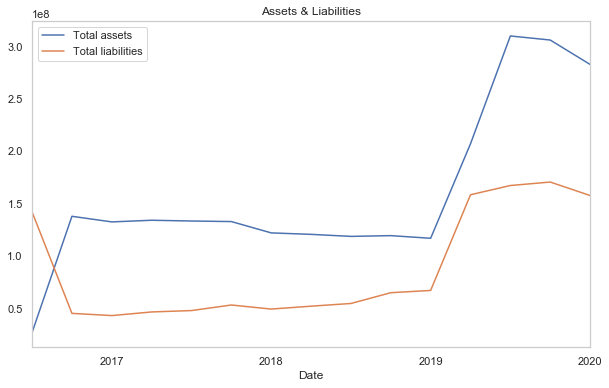

In [252]:
fig = plt.figure(figsize= (10, 6))
plt.title('Assets & Liabilities')
stock_bs['totalAssets'].plot(label='Total assets')
stock_bs['totalLiabilities'].plot(label='Total liabilities')
plt.grid()
plt.legend()

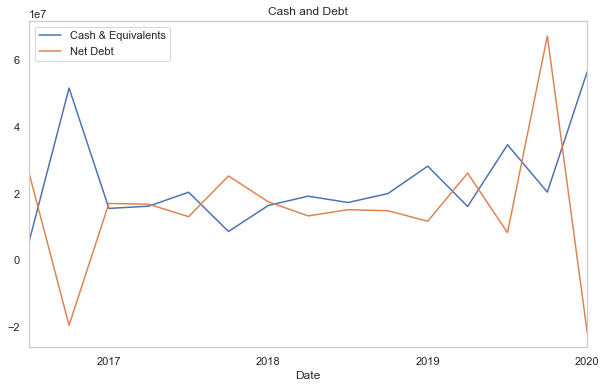

In [253]:
fig = plt.figure(figsize = (10, 6))
plt.title('Cash and Debt')
stock_bs['cashAndCashEquivalents'].plot(label='Cash & Equivalents')
stock_bs['netDebt'].plot(label='Net Debt')
plt.grid()
plt.legend()

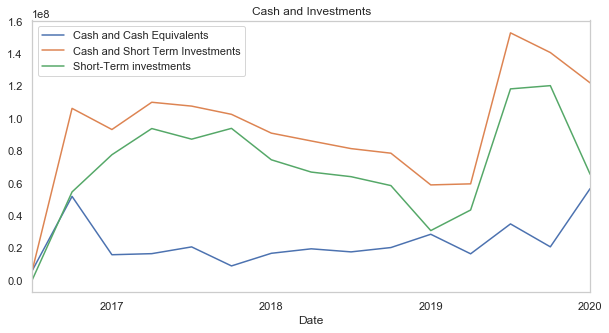

In [254]:
fig = plt.figure(figsize = (10, 5))
plt.title('Cash and Investments')
stock_bs['cashAndCashEquivalents'].plot(label='Cash and Cash Equivalents')
stock_bs['cashAndShortTermInvestments'].plot(label='Cash and Short Term Investments')
stock_bs['shortTermInvestments'].plot(label='Short-Term investments')
plt.grid()
plt.legend()

In [12]:
bs_c

Index(['cashAndCashEquivalents', 'shortTermInvestments',
       'cashAndShortTermInvestments', 'netReceivables', 'inventory',
       'otherCurrentAssets', 'totalCurrentAssets', 'propertyPlantEquipmentNet',
       'goodwill', 'intangibleAssets', 'goodwillAndIntangibleAssets',
       'longTermInvestments', 'taxAssets', 'otherNonCurrentAssets',
       'totalNonCurrentAssets', 'otherAssets', 'totalAssets',
       'accountPayables', 'shortTermDebt', 'taxPayables', 'deferredRevenue',
       'otherCurrentLiabilities', 'totalCurrentLiabilities', 'longTermDebt',
       'deferredRevenueNonCurrent', 'deferrredTaxLiabilitiesNonCurrent',
       'otherNonCurrentLiabilities', 'totalNonCurrentLiabilities',
       'otherLiabilities', 'totalLiabilities', 'commonStock',
       'retainedEarnings', 'accumulatedOtherComprehensiveIncomeLoss',
       'othertotalStockholdersEquity', 'totalStockholdersEquity',
       'totalLiabilitiesAndStockholdersEquity', 'totalInvestments',
       'totalDebt', 'netDebt'],
  

# Percentage Changes on Balance Sheet

In [23]:
stock_bs_pc = stock_bs.pct_change(-1).round(4)
stock_bs_pc.head(8)

,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,totalCurrentAssets,propertyPlantEquipmentNet,goodwill,intangibleAssets,...,totalLiabilities,commonStock,retainedEarnings,accumulatedOtherComprehensiveIncomeLoss,othertotalStockholdersEquity,totalStockholdersEquity,totalLiabilitiesAndStockholdersEquity,totalInvestments,totalDebt,netDebt
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-16,-0.1375,-0.0645,-0.1302,NaN,-0.1424,0.1187,-0.1103,0.0115,NaN,NaN,...,-0.0956,0.0,0.0553,-0.0310,0.0180,0.0475,-0.0515,-0.0645,-0.1775,-0.0149
2019-11-24,0.0767,-0.0632,0.0610,NaN,0.2126,0.0601,0.1345,0.0166,NaN,NaN,...,0.1795,0.0,0.0516,-0.0801,-0.0041,0.0405,0.1328,-0.0632,-0.0023,0.4222
2019-09-01,0.1955,-0.0815,0.1564,NaN,0.0081,-0.0597,0.0538,0.0203,NaN,NaN,...,0.0304,0.0,0.0802,0.0871,0.0174,0.0523,0.0377,-0.0815,0.0500,2.0311
2019-05-12,0.1535,0.1075,0.1467,NaN,-0.0046,-0.1123,0.0294,0.0164,NaN,NaN,...,0.0112,0.0,0.0651,0.0320,0.0143,0.0453,0.0223,0.1075,0.0009,-2.2500
2019-02-17,-0.1030,-0.1132,-0.1045,NaN,-0.0696,0.1338,-0.0569,0.0134,NaN,NaN,...,-0.0557,0.0,0.0631,-0.0383,0.0182,0.0525,-0.0232,-0.1132,-0.3551,-0.8747
2018-11-25,0.1194,-0.0241,0.0956,NaN,0.1055,0.4050,0.1314,0.0101,NaN,NaN,...,0.0933,0.0,0.0634,0.1101,0.0000,0.0288,0.0731,-0.0241,0.0595,-0.0459
2018-09-02,0.0303,0.0317,0.0305,NaN,0.0390,-0.0163,0.0303,0.0262,NaN,NaN,...,0.0207,0.0,0.0991,0.1551,0.0177,0.0540,0.0309,0.0317,-0.0286,-0.1173
2018-05-13,0.2292,0.1125,0.2082,NaN,-0.0042,-0.1564,0.0420,0.0068,NaN,NaN,...,0.0190,0.0,0.0667,0.1572,0.0137,0.0331,0.0233,0.1125,0.0103,-0.2033


# Transpose Balance Sheet

In [41]:
def get_bs_transposed(ticker):
    bs = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{ticker}?period=quarter&apikey=96e7d56bd5004623b04321f03aaeb2ac')
    bs = bs.json()
    balance_sheet = pd.DataFrame.from_dict(bs)
    #Transpose columns and rows
    bs = balance_sheet.T
    bs.columns = bs.iloc[0]
    # Remove top row
    cols = bs.columns
    bs = bs.iloc[1:,]
    #Keep only 4 last 4 quarters(columns) and remove last 12 rows(liabilities & equites)
    #s = bs.iloc[:12,:4]
    balance_sheet_assets = bs[cols].apply(pd.to_numeric,  errors='coerce')
    bs_transpose = (balance_sheet_assets/1000)
    #bs = bs_transpose.replace('%', '') 
    return bs_transpose

In [42]:
#get_bs_transposed('AMD').head()

# Income Statement

In [7]:
def get_is(ticker):
    income = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{ticker}?period=quarter&apikey=96e7d56bd5004623b04321f03aaeb2ac')
    income = income.json()
    income_statement = pd.DataFrame(income)
    return income_statement

In [8]:
def clean_is(ticker, clean):
    #Make a date only dataframe
    income_statement = get_is(ticker)
    date = income_statement['date']
    #Drop date column and change dataframe to all float datatype
    drop_date = income_statement.drop('date', axis=1)
    is1 = drop_date.apply(pd.to_numeric, errors='coerce')
    #Combine seperated dataframes
    s1 = pd.Series(date, name='Date')
    is2 = pd.concat([s1, is1], axis=1)
    #Create datetime series and set index
    is_date = pd.to_datetime(is2['Date'])
    is_index = pd.DatetimeIndex(is_date)
    income = is2.set_index(is_index)
    #income = income.drop('Date', axis=1)
    #income = (income/1000)
    return income

In [9]:
stock_is = clean_is('IRTC', get_is('IRTC'))

ValueError: If using all scalar values, you must pass an index

In [256]:
stock_is = stock_is.drop(columns={'symbol', 'fillingDate', 'acceptedDate', 'period', 'researchAndDevelopmentExpenses', 'sellingAndMarketingExpenses','link', 'finalLink'})

In [257]:
stock_is.head(8)

,Date,revenue,costOfRevenue,grossProfit,grossProfitRatio,generalAndAdministrativeExpenses,otherExpenses,operatingExpenses,costAndExpenses,interestExpense,...,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-31,2020-03-31,63535000,16063000,47472000,0.747179,48230000,0,56645000,72708000,380000,...,505000,-9048000,-0.142410,17000,-9065000,-0.142677,-0.34,-0.34,26839870,26839870
2019-12-31,2019-12-31,59104000,13915000,45189000,0.764568,53647000,1895000,62915000,76830000,385000,...,829000,-17282000,-0.292400,18000,-17300000,-0.292704,-0.66,-0.66,25265918,25265918
2019-09-30,2019-09-30,54903000,14015000,40888000,0.744732,45982000,0,58618000,72633000,409000,...,377000,-17762000,-0.323516,20000,-17782000,-0.323880,-0.71,-0.71,24818482,24818482
2019-06-30,2019-06-30,53331000,12825000,40506000,0.759521,43189000,0,51828000,64653000,440000,...,310000,-11452000,-0.214734,15000,-11467000,-0.215016,-0.46,-0.46,24600250,24600250
2019-03-31,2019-03-31,47214000,11730000,35484000,0.751557,36705000,0,43461000,55191000,409000,...,379000,-8007000,-0.169590,12000,-8019000,-0.169844,-0.33,-0.33,24474308,24474308
2018-12-31,2018-12-31,43155000,10529000,32626000,0.756019,37172000,1526000,44175000,54704000,535000,...,444000,-48236000,-1.117738,44000,-48280000,-1.118758,-0.61,-0.61,23885858,23885858
2018-09-30,2018-09-30,38104000,9949000,28155000,0.738899,32739000,0,37903000,47852000,861000,...,365000,-10244000,-0.268843,0,-10244000,-0.268843,-0.42,-0.42,23764153,23764153
2018-06-30,2018-06-30,35469000,9490000,25979000,0.732442,33094000,0,37658000,47148000,861000,...,334000,-12206000,-0.344131,0,-12206000,-0.344131,-0.52,-0.52,23614281,23614281


In [258]:
c_is = stock_is.columns
c_is

Index(['Date', 'revenue', 'costOfRevenue', 'grossProfit', 'grossProfitRatio',
       'generalAndAdministrativeExpenses', 'otherExpenses',
       'operatingExpenses', 'costAndExpenses', 'interestExpense',
       'depreciationAndAmortization', 'ebitda', 'ebitdaratio',
       'operatingIncome', 'operatingIncomeRatio',
       'totalOtherIncomeExpensesNet', 'incomeBeforeTax',
       'incomeBeforeTaxRatio', 'incomeTaxExpense', 'netIncome',
       'netIncomeRatio', 'eps', 'epsdiluted', 'weightedAverageShsOut',
       'weightedAverageShsOutDil'],
      dtype='object')

In [259]:
stock_is.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 2020-03-31 to 2016-09-30
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              15 non-null     object 
 1   revenue                           15 non-null     int64  
 2   costOfRevenue                     15 non-null     int64  
 3   grossProfit                       15 non-null     int64  
 4   grossProfitRatio                  15 non-null     float64
 5   generalAndAdministrativeExpenses  15 non-null     int64  
 6   otherExpenses                     15 non-null     int64  
 7   operatingExpenses                 15 non-null     int64  
 8   costAndExpenses                   15 non-null     int64  
 9   interestExpense                   15 non-null     int64  
 10  depreciationAndAmortization       15 non-null     int64  
 11  ebitda                            15 non-null     int

# Revenue and Profit

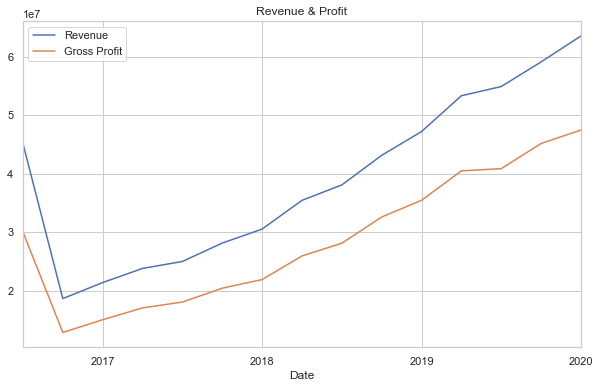

In [260]:
fig = plt.figure(figsize=(10, 6))
plt.title('Revenue & Profit')
stock_is['revenue'].plot(label='Revenue')
stock_is['grossProfit'].plot(label='Gross Profit')
plt.legend()

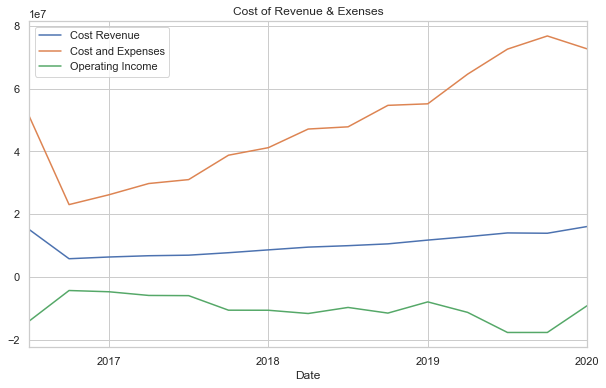

In [261]:
fig = plt.figure(figsize=(10, 6))
plt.title('Cost of Revenue & Exenses')
stock_is['costOfRevenue'].plot(label='Cost Revenue')
stock_is['costAndExpenses'].plot(label='Cost and Expenses')
stock_is['operatingIncome'].plot(label='Operating Income')
plt.legend()

In [262]:
c_is

Index(['Date', 'revenue', 'costOfRevenue', 'grossProfit', 'grossProfitRatio',
       'generalAndAdministrativeExpenses', 'otherExpenses',
       'operatingExpenses', 'costAndExpenses', 'interestExpense',
       'depreciationAndAmortization', 'ebitda', 'ebitdaratio',
       'operatingIncome', 'operatingIncomeRatio',
       'totalOtherIncomeExpensesNet', 'incomeBeforeTax',
       'incomeBeforeTaxRatio', 'incomeTaxExpense', 'netIncome',
       'netIncomeRatio', 'eps', 'epsdiluted', 'weightedAverageShsOut',
       'weightedAverageShsOutDil'],
      dtype='object')

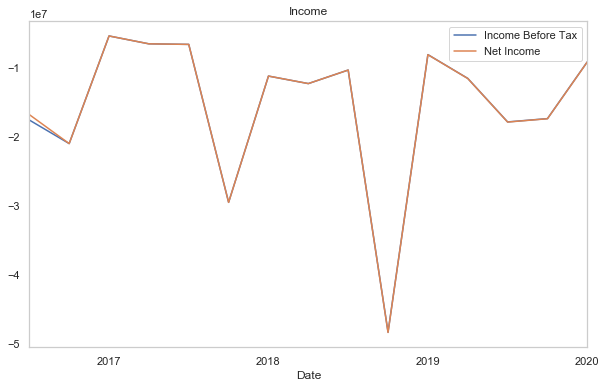

In [263]:
fig = plt.figure(figsize=(10, 6))
plt.title('Income')
stock_is['incomeBeforeTax'].plot(label='Income Before Tax')
stock_is['netIncome'].plot(label='Net Income')
plt.grid()
plt.legend()

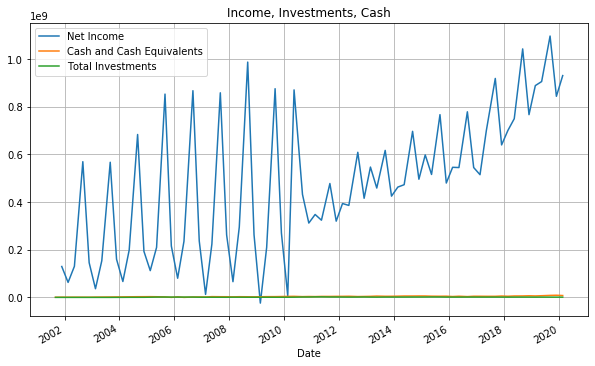

In [194]:
fig = plt.figure(figsize=(10, 6))
plt.title('Income, Investments, Cash')
stock_is['netIncome'].plot(label='Net Income')
stock_bs['cashAndCashEquivalents'].plot(label='Cash and Cash Equivalents')
stock_bs['totalInvestments'].plot(label='Total Investments')
plt.grid()
plt.legend()

# Revenue and Profit Last Two Years

In [195]:
#Create a two year data frame
two_yr_is = stock_is.head(8)
two_yr_is

,Date,revenue,costOfRevenue,grossProfit,grossProfitRatio,generalAndAdministrativeExpenses,otherExpenses,operatingExpenses,costAndExpenses,interestExpense,...,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-16,2020-02-16,39072000000,34056000000,5016000000,0.128378,3743000000,0,3743000000,37799000000,34000000,...,10000000,1277000000,0.032683,330000000,931000000,0.023828,2.11,2.10,441920000,443704000
2019-11-24,2019-11-24,37040000000,32233000000,4807000000,0.129779,3732000000,0,3732000000,35965000000,38000000,...,35000000,1058000000,0.028564,202000000,844000000,0.022786,1.91,1.90,441818000,443680000
2019-09-01,2019-09-01,47498000000,41310000000,6188000000,0.130279,4684000000,0,4684000000,45994000000,45000000,...,142000000,1492000000,0.031412,382000000,1097000000,0.023096,2.49,2.47,439755000,442923000
2019-05-12,2019-05-12,34740000000,30233000000,4507000000,0.129735,3371000000,0,3371000000,33604000000,35000000,...,36000000,1123000000,0.032326,207000000,906000000,0.026079,2.06,2.05,439767000,442565000
2019-02-17,2019-02-17,35396000000,30720000000,4676000000,0.132105,3464000000,0,3464000000,34184000000,34000000,...,24000000,1215000000,0.034326,314000000,889000000,0.025116,2.02,2.01,439721000,442535000
2018-11-25,2018-11-25,35069000000,30623000000,4446000000,0.126779,3475000000,0,3475000000,34098000000,36000000,...,22000000,935000000,0.026662,158000000,767000000,0.021871,1.75,1.73,439157000,442749000
2018-09-02,2018-09-02,44411000000,38671000000,5740000000,0.129247,4263000000,0,4263000000,42934000000,48000000,...,80000000,1449000000,0.032627,396000000,1043000000,0.023485,2.38,2.35,438515000,441834000
2018-05-13,2018-05-13,32361000000,28131000000,4230000000,0.130713,3155000000,0,3155000000,31286000000,37000000,...,41000000,1071000000,0.033095,309000000,750000000,0.023176,1.71,1.70,438576000,441383000


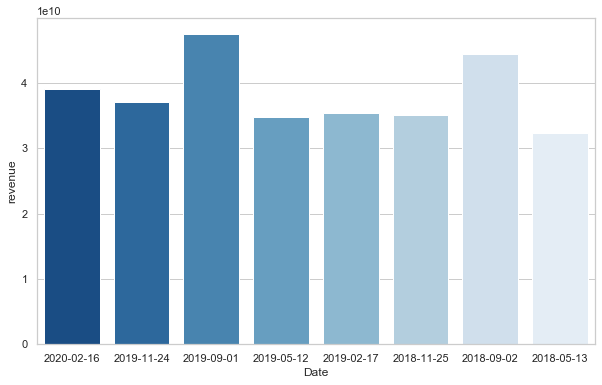

In [224]:
#Create a stacked bar chart of revenue and cost of revenue
fig = plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x='Date', y='revenue', data=two_yr_is, palette='Blues_r')

In [215]:
two_revenue = two_yr_is[['revenue', 'costOfRevenue', 'grossProfit']]
two_revenue

,revenue,costOfRevenue,grossProfit
Date,,,
2020-02-16,39072000000,34056000000,5016000000
2019-11-24,37040000000,32233000000,4807000000
2019-09-01,47498000000,41310000000,6188000000
2019-05-12,34740000000,30233000000,4507000000
2019-02-17,35396000000,30720000000,4676000000
2018-11-25,35069000000,30623000000,4446000000
2018-09-02,44411000000,38671000000,5740000000
2018-05-13,32361000000,28131000000,4230000000


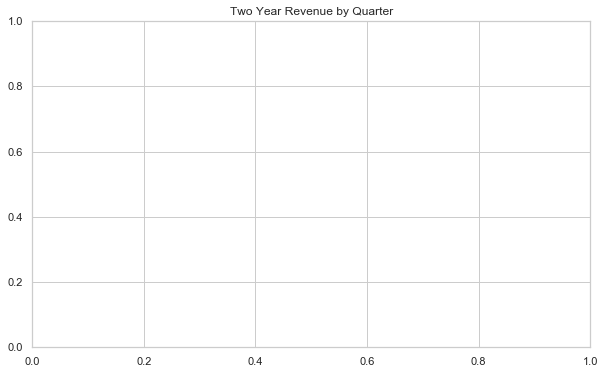

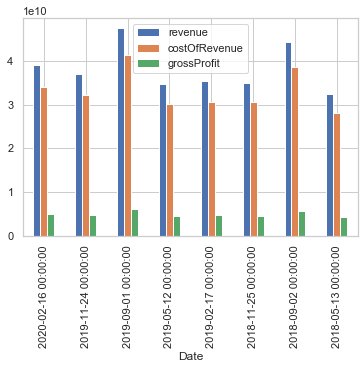

In [233]:
fig = plt.figure(figsize=(10, 6))
plt.title('Two Year Revenue by Quarter')
two_revenue.plot(kind='bar')
plt.show()

In [234]:
c_is

Index(['Date', 'revenue', 'costOfRevenue', 'grossProfit', 'grossProfitRatio',
       'generalAndAdministrativeExpenses', 'otherExpenses',
       'operatingExpenses', 'costAndExpenses', 'interestExpense',
       'depreciationAndAmortization', 'ebitda', 'ebitdaratio',
       'operatingIncome', 'operatingIncomeRatio',
       'totalOtherIncomeExpensesNet', 'incomeBeforeTax',
       'incomeBeforeTaxRatio', 'incomeTaxExpense', 'netIncome',
       'netIncomeRatio', 'eps', 'epsdiluted', 'weightedAverageShsOut',
       'weightedAverageShsOutDil'],
      dtype='object')

In [238]:
#Waterfall Income Statement 
#Revenues, Total Cost and Expenses, Operating Income, Other income, Income taxes, Net Income

two_year = two_yr_is[['revenue', 'costAndExpenses', 'operatingIncome', 'incomeTaxExpense', 'netIncome']]
two_year

,revenue,costAndExpenses,operatingIncome,incomeTaxExpense,netIncome
Date,,,,,
2020-02-16,39072000000,37799000000,1266000000,330000000,931000000
2019-11-24,37040000000,35965000000,1061000000,202000000,844000000
2019-09-01,47498000000,45994000000,1463000000,382000000,1097000000
2019-05-12,34740000000,33604000000,1122000000,207000000,906000000
2019-02-17,35396000000,34184000000,1203000000,314000000,889000000
2018-11-25,35069000000,34098000000,949000000,158000000,767000000
2018-09-02,44411000000,42934000000,1446000000,396000000,1043000000
2018-05-13,32361000000,31286000000,1067000000,309000000,750000000


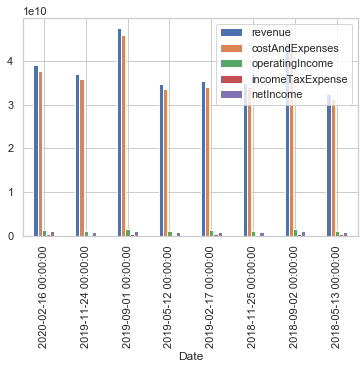

In [239]:
two_year.plot(kind='bar')

# Correlation Matrix of the Income Statement (20 Years)

In [101]:
is_corr = stock_is.corr()
is_corr

,revenue,costOfRevenue,grossProfit,grossProfitRatio,generalAndAdministrativeExpenses,otherExpenses,operatingExpenses,costAndExpenses,interestExpense,depreciationAndAmortization,...,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil
revenue,1.000000,0.969382,0.585556,0.201886,0.998636,0.188865,0.998636,0.932977,0.872778,0.721939,...,0.574371,0.982491,-0.255033,0.954517,0.960942,-0.233642,0.933511,0.933889,-0.319515,-0.411574
costOfRevenue,0.969382,1.000000,0.368571,0.089363,0.969278,0.185520,0.969278,0.990647,0.862409,0.719205,...,0.567909,0.954615,-0.218147,0.917717,0.937433,-0.200888,0.906535,0.908536,-0.347028,-0.447543
grossProfit,0.585556,0.368571,1.000000,0.469272,0.580736,0.102543,0.580736,0.261632,0.457073,0.358790,...,0.299605,0.568019,-0.245328,0.583928,0.543164,-0.221320,0.541320,0.536147,-0.063976,-0.080658
grossProfitRatio,0.201886,0.089363,0.469272,1.000000,0.203967,-0.008006,0.203967,0.085885,0.169347,0.311371,...,0.081545,0.176717,-0.340865,0.179896,0.168864,-0.281261,0.118097,0.117924,-0.106401,-0.145273
generalAndAdministrativeExpenses,0.998636,0.969278,0.580736,0.203967,1.000000,0.191266,1.000000,0.934346,0.883417,0.735500,...,0.560698,0.978379,-0.260168,0.949686,0.957142,-0.238539,0.925729,0.926565,-0.333909,-0.428128
otherExpenses,0.188865,0.185520,0.102543,-0.008006,0.191266,1.000000,0.191266,0.179644,0.168516,0.227156,...,0.057066,0.195369,-0.017596,0.186630,0.185500,-0.017319,0.222852,0.222893,0.072178,0.058937
operatingExpenses,0.998636,0.969278,0.580736,0.203967,1.000000,0.191266,1.000000,0.934346,0.883417,0.735500,...,0.560698,0.978379,-0.260168,0.949686,0.957142,-0.238539,0.925729,0.926565,-0.333909,-0.428128
costAndExpenses,0.932977,0.990647,0.261632,0.085885,0.934346,0.179644,0.934346,1.000000,0.841607,0.717446,...,0.549141,0.918240,-0.214545,0.876249,0.904226,-0.196376,0.866876,0.869943,-0.359469,-0.463752
interestExpense,0.872778,0.862409,0.457073,0.169347,0.883417,0.168516,0.883417,0.841607,1.000000,0.720192,...,0.395047,0.828474,-0.241597,0.814971,0.803533,-0.225415,0.773294,0.776257,-0.523953,-0.562159
depreciationAndAmortization,0.721939,0.719205,0.358790,0.311371,0.735500,0.227156,0.735500,0.717446,0.720192,1.000000,...,0.290422,0.756875,-0.242632,0.639508,0.776801,-0.194313,0.673750,0.683116,-0.489786,-0.617762


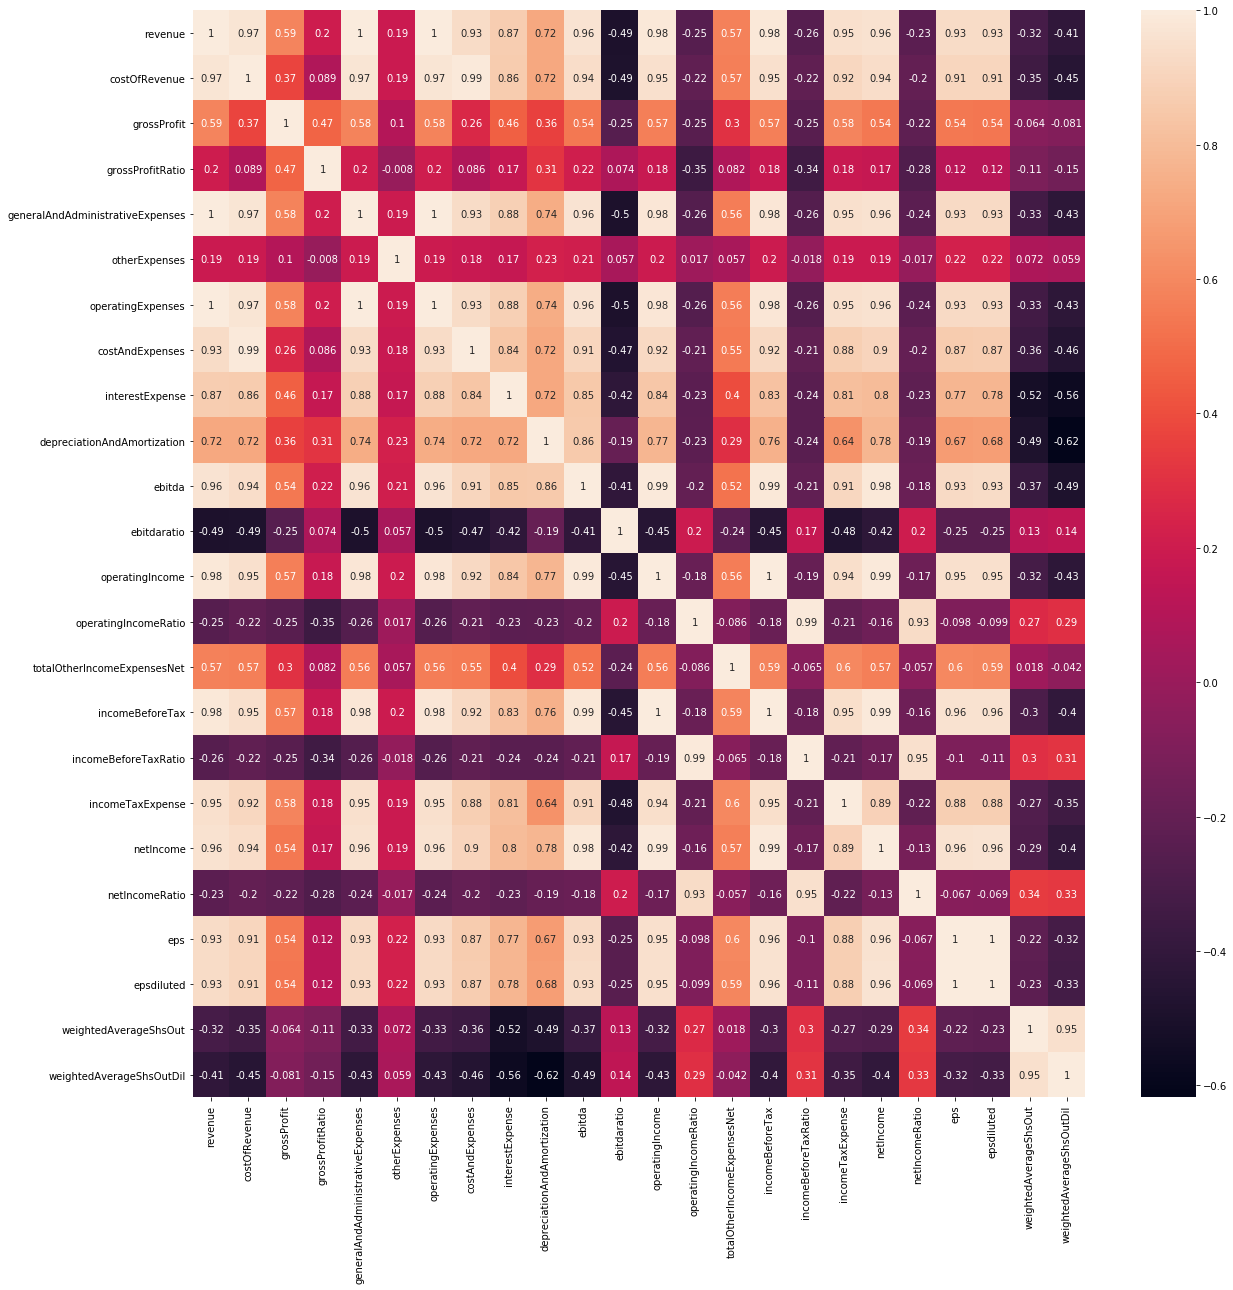

In [100]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(is_corr, annot=True)

# Revenue Analysis of Competitors

In [448]:
amd = stock_revenue('AMD')
nvidia = stock_revenue('NVDA')
intel = stock_revenue('INTC')

In [449]:
semi_con = pd.concat([amd, intel], axis=1)

In [450]:
semi_con.tail(12)

,Revenue,Revenue
2017-07-01,1.222000e+09,1.476300e+10
2017-09-30,1.643000e+09,1.614900e+10
2017-12-30,1.480000e+09,1.705300e+10
2018-03-31,1.647000e+09,1.606600e+10
2018-06-30,1.756000e+09,1.696200e+10
2018-09-29,1.653000e+09,1.916300e+10
2018-12-29,1.419000e+09,1.865700e+10
2019-03-30,1.272000e+09,1.606100e+10
2019-06-29,1.531000e+09,1.650500e+10
2019-09-28,1.801000e+09,1.919000e+10


# Income Statement Transposed

In [340]:
def get_is_transposed(ticker):
    income = requests.get(f'https://financialmodelingprep.com/api/v3/financials/income-statement/{ticker}?period=quarter')
    income = income.json()
    income['financials']
    income = income['financials']
    income = pd.DataFrame.from_dict(income) 
    income = income.T
    income.columns = income.iloc[0]
    #Remove top row
    cols = income.columns
    income = income.iloc[1:,]
    #Keep only 4 last 4 quarters(columns) and remove last 12 rows(liabilities & equites)
    #income = income.iloc[:12,:4]
    income_statement = income.apply(pd.to_numeric,  errors='coerce')
    
    return income_statement

In [405]:
#get_is_transposed('AMD').head()

# Cash Flow Statement

In [128]:
def get_cf(ticker):
    cf = requests.get(f'https://financialmodelingprep.com/api/v3/financials/cash-flow-statement/{ticker}?period=quarter')
    cf = cf.json()
    cf['financials']
    cash_flow = cf['financials']
    cash_flow = pd.DataFrame.from_dict(cash_flow)
    return cash_flow

In [132]:
def clean_cf(clean, ticker):
    cf_date = cash_flow['date']
    drop_date = cf_date.drop('date', axis=1)
    cf1 = drop_date.apply(pd.to_numeric, errors='coerce')
    s1 = pd.Series(date, name='Date')
    cf2 = pd.concat([s1, cf1], axis=1)
    cf_date = pd.to_datetime(cf2['Date'])
    cf_index = pd.DatetimeIndex(cf_date.values)
    cf = cf2.set_index(cf_index)
    cf = cf.drop('Date', axis=1)
    return cf

In [133]:
stock_cf = clean_cf(get_cf('AMD'))
stock_cf.head(12)

NameError: name 'cash_flow' is not defined

# Financial Ratios

In [98]:
ratios = requests.get(f'https://financialmodelingprep.com/api/v3/financial-ratios/AAPL')
ratios = ratios.json()
ratios 

{'symbol': 'AAPL',
 'ratios': [{'date': '2019-09-28',
   'investmentValuationRatios': {'priceBookValueRatio': '12.709658271815046',
    'priceToBookRatio': '12.709658271815046',
    'priceToSalesRatio': '4.420393881402446',
    'priceEarningsRatio': '20.81351450883162',
    'receivablesTurnover': '11.34842536857716',
    'priceToFreeCashFlowsRatio': '19.527159020986144',
    'priceToOperatingCashFlowsRatio': '16.573785616290298',
    'priceCashFlowRatio': '16.573785616290298',
    'priceEarningsToGrowthRatio': '1.6145093305735827',
    'priceSalesRatio': '4.420393881402446',
    'dividendYield': '0.012276627402416805',
    'enterpriseValueMultiple': '15.734071128574604',
    'priceFairValue': '12.709658271815046'},
   'profitabilityIndicatorRatios': {'ebitperRevenue': '0.24572017188496928',
    'ebtperEBIT': '1.0282652901611138',
    'niperEBT': '0.8405616319576494',
    'grossProfitMargin': '0.3781776810903472',
    'operatingProfitMargin': '0.24572017188496928',
    'pretaxProfitMarg

In [107]:
valuation_ratios = ratios['ratios'][1]['investmentValuationRatios']
valuation_ratios

{'priceBookValueRatio': '9.815759792434694',
 'priceToBookRatio': '9.815759792434694',
 'priceToSalesRatio': '3.95989839597884',
 'priceEarningsRatio': '17.66691663973392',
 'receivablesTurnover': '11.45497282843095',
 'priceToFreeCashFlowsRatio': '16.402258456355952',
 'priceToOperatingCashFlowsRatio': '13.5822663749774',
 'priceCashFlowRatio': '13.5822663749774',
 'priceEarningsToGrowthRatio': '1.4705990555753263',
 'priceSalesRatio': '3.95989839597884',
 'dividendYield': '0.013037576413411259',
 'enterpriseValueMultiple': '13.79366040121759',
 'priceFairValue': '9.815759792434694'}

In [95]:
ratios = pd.DataFrame.from_dict(ratios)
ratios.head()

,symbol,ratios
0,AAPL,"{'date': '2019-09-28', 'investmentValuationRat..."
1,AAPL,"{'date': '2018-09-29', 'investmentValuationRat..."
2,AAPL,"{'date': '2017-09-30', 'investmentValuationRat..."
3,AAPL,"{'date': '2016-09-24', 'investmentValuationRat..."
4,AAPL,"{'date': '2015-09-26', 'investmentValuationRat..."


# Financial Growth

In [19]:
def get_fg(ticker):
    fg = requests.get(f'https://financialmodelingprep.com/api/v3/financial-statement-growth/{ticker}?period=quarter')
    fg = fg.json()
    fg['growth']
    fg = fg['growth']
    financial_growth = pd.DataFrame.from_dict(fg)
    return financial_growth

In [20]:
get_fg('AMD').head()

,date,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth
0,2020-03-28,-0.13804004215,-0.491379310345,-0.491379310345,-0.0470588235294,-0.0666666666667,-0.0666666666667,0.0724106324473,0.0928571428571,0,-1.14705882353,-1.3,-0.0903711672942,0.0753564154786,-0.0272063702721,0,0.158436213992,0.118987341772,-0.0339805825243
1,2019-12-28,0.221364221364,0.870967741935,0.870967741935,0.416666666667,0.363636363636,0.5,0.0148837209302,0.0117434507678,0,0.888888888889,1.23463687151,0.334529791816,-0.0557692307692,0.147534742052,0,-0.442660550459,-0.0270935960591,0.113513513514
2,2019-09-28,0.251207729469,2.15254237288,2.15254237288,2.42857142857,1.75,1.5,0.0103383458647,0.00453720508167,0,6.8,-7.39285714286,0.0450112528132,0.0246305418719,0.0295962367699,0,-0.154219204656,0.088471849866,-0.021164021164
3,2019-06-29,0.191938579655,0.552631578947,0.552631578947,1.1875,3.0,3.0,0.0191570881226,0.0073126142596,0,-1.14084507042,-0.898181818182,0.0741337630943,0.0628272251309,0.0346785641858,0,-0.0575868372943,0.0,0.111764705882
4,2019-03-30,-0.0297951582868,0.357142857143,0.357142857143,-0.578947368421,-0.666666666667,-0.75,0.0631364562118,0.0281954887218,0,-4.04285714286,-10.4827586207,0.00485829959514,0.130177514793,0.0823090430202,0,-0.1248,0.00539083557951,0.231884057971


# Financial Growth Transposed

In [ ]:
def get_fg_transposed(ticker):
    fg = requests.get(f'https://financialmodelingprep.com/api/v3/financial-statement-growth/{ticker}?period=quarter')
    fg = fg.json()
    fg['growth']
    fg = fg['growth']
    financial_growth = pd.DataFrame.from_dict(fg) 
    fg = financial_growth.T
    fg.columns = fg.iloc[0]
    #Remove top row
    cols = fg.columns
    fg = fg.iloc[1:,]
    #Keep only 4 last 4 quarters(columns) and remove last 12 rows(liabilities & equites)
    #fg = fg.iloc[:12,:4]
    financial_growth = fg.apply(pd.to_numeric,  errors='coerce')
    
    return financial_growth

In [ ]:
get_fg_transposed('AAPL').head()

In [ ]:
get_fg_transposed('AAPL').dtypes

# Key Metrics

In [108]:
def metrics(ticker):
    metrics = requests.get(f'https://financialmodelingprep.com/api/v3/company-key-metrics/{ticker}')
    metrics = metrics.json()
    metrics = metrics['metrics']
    metrics = pd.DataFrame.from_dict(metrics)
    return metrics

In [109]:
metrics('AAPL').head()

,date,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,...,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share
0,2019-09-28,56.34113309400035,11.965783092246278,15.026741974700693,12.75403143551717,10.577253318330628,19.59533408953202,73.30622971722241,19.59533408953202,22.87717574949641,...,5.1062E10,4.031E9,32.16305241876591,104.31407696777144,9.263638723714628,11.34842536857716,3.4990483605848257,39.40136385776912,0.6106445053487756,2.272710539183522
1,2018-09-29,53.59733477392336,12.013414922820202,15.626258103066629,12.939681481348442,5.229269135325122,21.6223710123367,73.80366821737276,21.6223710123367,21.34227123385365,...,5.5888E10,3.956E9,31.86389050998701,124.57021422115831,8.817631109699796,11.45497282843095,2.9300744345834526,41.3943377148635,0.5556011834209077,2.6865766217181863
2,2017-09-30,43.93777401929985,9.267540206108897,12.18996550284614,9.737520322039883,3.8888362855317045,25.693076916884436,70.401948002412,25.693076916884436,20.32223155452632,...,5.24685E10,4.4055E9,28.46004519399391,126.92760620497985,12.563630820713515,12.824997202640708,2.8756549572876104,29.05211122554068,0.3607018433832909,2.4524451808062575
3,2016-09-24,39.4162118293053,8.351033300309643,12.031834350243656,9.55542313583704,3.74422847032072,23.4423724414256,57.22469392156935,23.4423724414256,14.693044187160243,...,4.6591E10,3.044E9,26.665909227922594,103.61336926074777,5.923304104250396,13.687888790148534,3.5227114281117604,61.62101313320826,0.3562366958026963,2.4764112144066153
4,2015-09-26,40.62191868107688,9.280391613963241,14.124813741250641,12.128088662380174,3.670859476474953,20.74504890220966,48.922197767206676,20.74504890220966,9.854311026431057,...,4.5689E10,3.1525E9,26.313608454741885,92.46871631605622,6.120287817030602,13.871149623123033,3.947280924204001,59.63771817794807,0.44735453060198566,1.996725078870467


In [ ]:
metrics = metrics('AAPL').head()
metrics = metrics.apply(pd.to_numeric,  errors='ignore')
metrics

In [ ]:
metrics.dtypes

In [ ]:
metrics['Revenue per Share'].pct_change()